In [154]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_csv('data_win_pct/49ersvs.Bears-December3,2017-WinProb.csv', index_col=0)

In [5]:
df.head()

,homeWinPercentage,playId,secondsLeft,tiePercentage,awayScore,clockdisplayValue,homeScore,periodnumber,startdistance,startdown,startteamid,startyardLine,startyardsToEndzone,playtext,playtypeabbreviation,playtypeid,Game Title,Game Date
0,0.685,40095170735,0,0,0,15:00,0,1,0,0,3.0,35,65,P.O'Donnell kicks 65 yards from CHI 35 to end ...,K,53,49ers vs. Bears,"December 3, 2017"
1,0.711,40095170750,0,0,0,15:00,0,1,10,1,25.0,75,75,(15:00) (Shotgun) J.Garoppolo pass incomplete ...,NaN,3,49ers vs. Bears,"December 3, 2017"
2,0.722,40095170772,0,0,0,14:55,0,1,10,2,25.0,75,75,(14:55) C.Hyde right end to SF 25 for no gain ...,RUSH,5,49ers vs. Bears,"December 3, 2017"
3,0.663,40095170793,0,0,0,14:12,0,1,10,3,25.0,75,75,(14:12) (Shotgun) J.Garoppolo pass short right...,REC,24,49ers vs. Bears,"December 3, 2017"
4,0.650,400951707117,0,0,0,13:39,0,1,10,1,25.0,60,60,(13:39) M.Breida left end to SF 48 for 8 yards...,RUSH,5,49ers vs. Bears,"December 3, 2017"


In [18]:
directory_in_str = '/Users/robmulla/Google Drive/Berkeley/W266/data/data_win_pct'
#directory = os.fsencode(directory_in_str)
dfs = []
for file in os.listdir(directory_in_str):
    #filename = os.fsdecode(file)
    if file.endswith("WinProb.csv"): 
        df = pd.read_csv(directory_in_str+'/'+file, index_col=0)
        dfs.append(df)
        print(file)
        print(df.shape)
        continue
    else:
        continue

Titansvs.Steelers-November16,2017-WinProb.csv
(181, 18)
Dolphinsvs.Bills-December17,2017-WinProb.csv
(175, 18)
Chargersvs.Chiefs-December16,2017-WinProb.csv
(169, 18)
Bengalsvs.Packers-September24,2017-WinProb.csv
(173, 18)
Jetsvs.Patriots-December31,2017-WinProb.csv
(185, 18)
Cardinalsvs.Rams-October22,2017-WinProb.csv
(169, 18)
Chiefsvs.Patriots-September7,2017-WinProb.csv
(193, 18)
Coltsvs.Jaguars-December3,2017-WinProb.csv
(168, 18)
Eaglesvs.Panthers-October12,2017-WinProb.csv
(184, 18)
Brownsvs.Colts-September24,2017-WinProb.csv
(191, 18)
Titansvs.49ers-December17,2017-WinProb.csv
(176, 18)
Titansvs.Dolphins-October8,2017-WinProb.csv
(170, 18)
Saintsvs.Buccaneers-December31,2017-WinProb.csv
(178, 18)
Jaguarsvs.Texans-September10,2017-WinProb.csv
(179, 18)
Panthersvs.Falcons-December31,2017-WinProb.csv
(179, 18)
Cardinalsvs.49ers-November5,2017-WinProb.csv
(191, 18)
Billsvs.Dolphins-December31,2017-WinProb.csv
(175, 18)
Vikingsvs.Browns-October29,2017-WinProb.csv
(183, 18)
Saintsvs

In [21]:
bigdf = pd.concat(dfs, ignore_index=True)

In [25]:
bigdf = bigdf.set_index('playId')

In [26]:
bigdf.to_csv('All_Games_Win_Pct.csv')

# Read and EDA

In [31]:
df = pd.read_csv('All_Games_Win_Pct.csv', encoding='utf-8')

In [32]:
df.columns

Index([u'playId', u'homeWinPercentage', u'secondsLeft', u'tiePercentage',
       u'awayScore', u'clockdisplayValue', u'homeScore', u'periodnumber',
       u'startdistance', u'startdown', u'startteamid', u'startyardLine',
       u'startyardsToEndzone', u'playtext', u'playtypeabbreviation',
       u'playtypeid', u'Game Title', u'Game Date'],
      dtype='object')

In [33]:
groupedgame = df.groupby('Game Title')

In [34]:
df['period-time'] = (df['periodnumber'].apply(str)) +'-'+ df['clockdisplayValue']

In [190]:
df['minutesleft'] = df[['periodnumber','clockdisplayValue']].apply(lambda x: int(60-(15*x['periodnumber']))+ int(x['clockdisplayValue'].split(':')[0]), axis=1)

In [188]:
df['secondsleft'] = df['clockdisplayValue'].apply(lambda x: x.split(':')[1])

In [211]:
def make_timeleft(col):
    mins = int(col['minutesleft'])
    secs = int(col['secondsleft'])
    hour = 0
    if mins == 60:
        hour = 1
        mins = 0
    if mins < 0:
        hour = 0
        mins = 0
        secs = 0
    return dt.time(hour, mins, secs)

In [214]:
df.loc[685]

playId                                                      4009516273889
homeWinPercentage                                                   0.445
secondsLeft                                                             0
tiePercentage                                                           0
awayScore                                                              24
clockdisplayValue                                                   10:00
homeScore                                                              24
periodnumber                                                            5
startdistance                                                           0
startdown                                                               0
startteamid                                                             9
startyardLine                                                          35
startyardsToEndzone                                                    65
playtext                M.Crosby kicks

In [215]:
df['timeleft'] = df.apply(make_timeleft, axis=1)

In [101]:
df.loc[df['Game Title'] == 'Jaguars vs. Steelers']

,playId,homeWinPercentage,secondsLeft,tiePercentage,awayScore,clockdisplayValue,homeScore,periodnumber,startdistance,startdown,startteamid,startyardLine,startyardsToEndzone,playtext,playtypeabbreviation,playtypeid,Game Title,Game Date,period-time


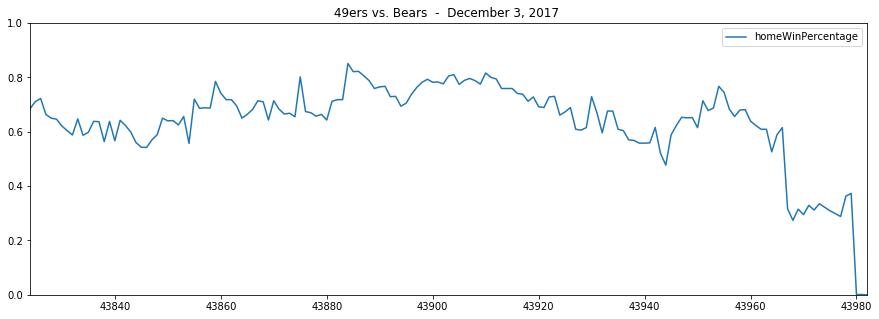

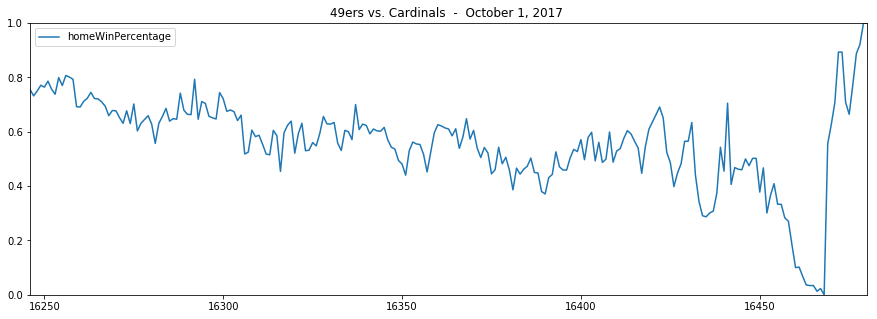

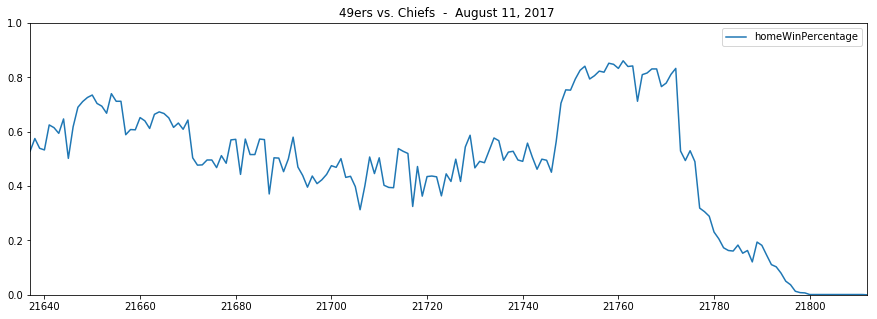

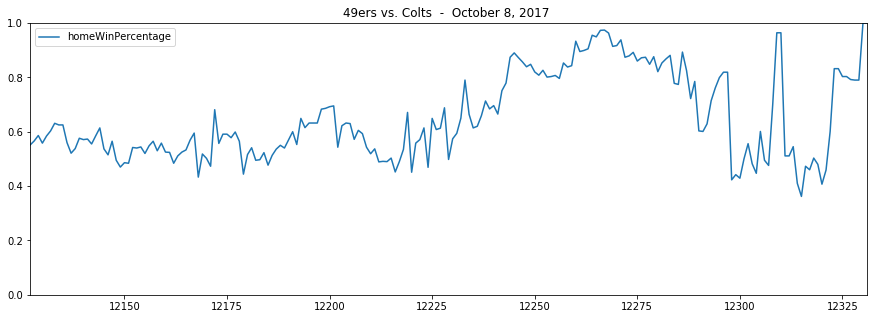

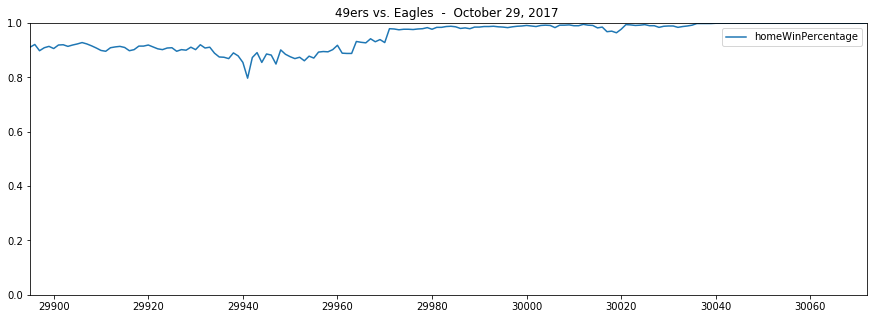

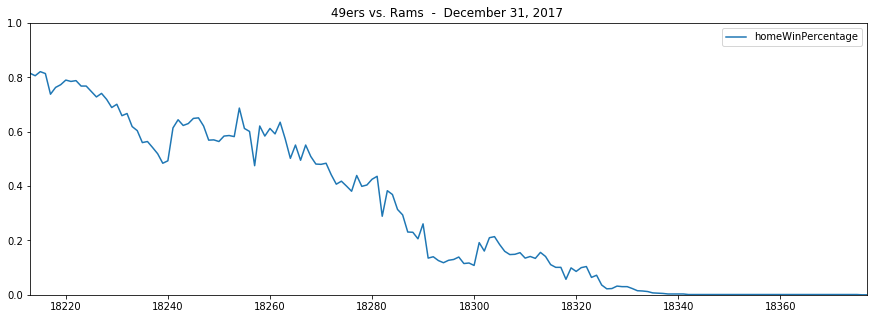

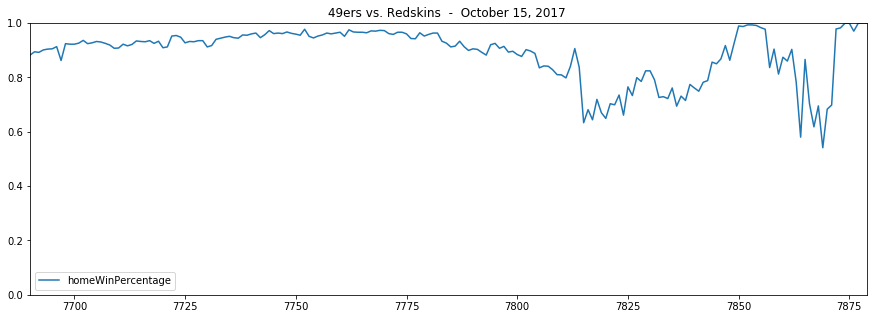

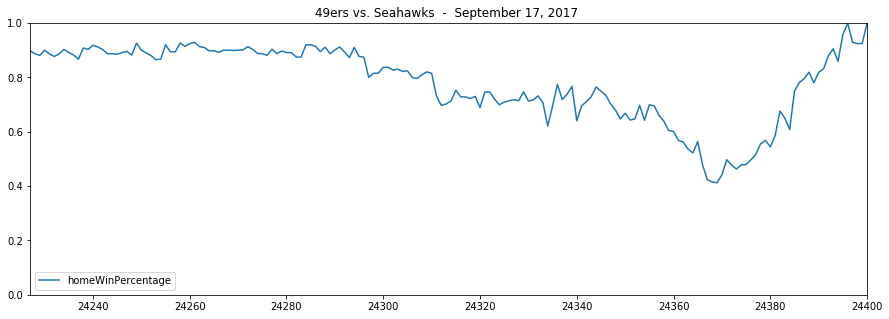

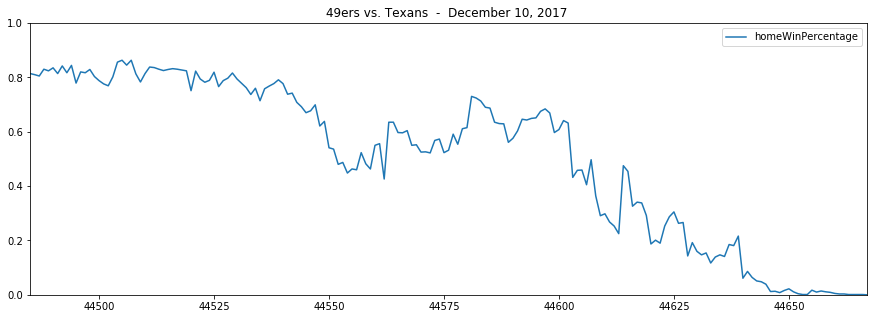

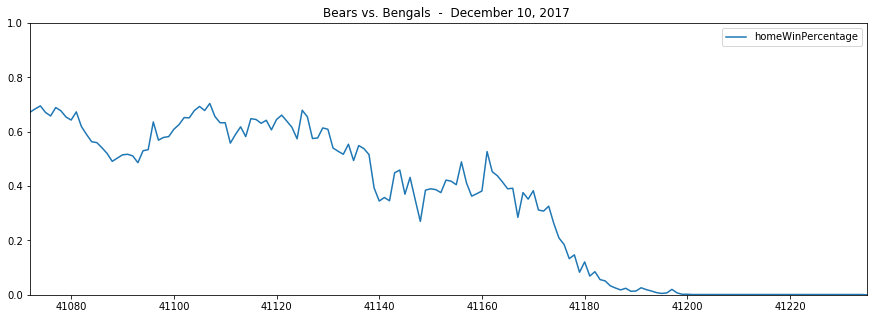

In [58]:
count = 0
for game,data in groupedgame:
    data.plot(y='homeWinPercentage',
              title=game+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(min(data.index),max(data.index)))
    count += 1
    if count == 10:
        break

# Games with most variance

In [129]:
game_win_stats = pd.DataFrame(columns=['Game Title',
                              'Game Date',
                              'WinPct_Variance',
                              'WinPct_Median',
                              'WinPct_Average',
                              'Home Score',
                              'Away Score',
                              '4th Quarter Variance'])
count = 1
for game, data in groupedgame:
    
    
    win_variance = np.var(data['homeWinPercentage'])
    win_average = np.average(data['homeWinPercentage'])
    win_median = np.median(data['homeWinPercentage'])
    fourth_qtr_var = np.var(data.loc[data['periodnumber'] == 4]['homeWinPercentage'])
    game_date = data['Game Date'].iloc[0]
    home_score = max(data['homeScore'])
    away_score = max(data['awayScore'])
    game_win_stats.loc[count] = [game, game_date, win_variance, win_average, win_median, home_score, away_score, fourth_qtr_var]

    count += 1

In [131]:
game_win_stats.sort_values('4th Quarter Variance')

,Game Title,Game Date,WinPct_Variance,WinPct_Median,WinPct_Average,Home Score,Away Score,4th Quarter Variance
20,Bengals vs. Browns,"October 1, 2017",0.035030,0.146049,0.0140,7,31,2.039931e-08
11,Bears vs. Buccaneers,"September 17, 2017",0.007707,0.940988,0.9945,29,7,2.082390e-08
191,Patriots vs. Raiders,"November 19, 2017",0.014484,0.098906,0.0130,8,33,2.082390e-08
44,Broncos vs. Eagles,"November 5, 2017",0.010780,0.927911,0.9890,51,23,2.126654e-08
13,Bears vs. Eagles,"November 26, 2017",0.000962,0.975853,0.9930,31,3,2.126654e-08
96,Cowboys vs. 49ers,"October 22, 2017",0.004232,0.056485,0.0400,10,40,2.172840e-08
142,Jaguars vs. Colts,"October 22, 2017",0.003219,0.041108,0.0195,0,27,2.221074e-08
209,Rams vs. Seahawks,"December 17, 2017",0.036466,0.128622,0.0065,7,42,2.324263e-08
55,Browns vs. Texans,"October 15, 2017",0.003672,0.953081,0.9905,33,17,2.437500e-08
271,Titans vs. Texans,"October 1, 2017",0.017558,0.892000,0.9315,57,14,2.437500e-08


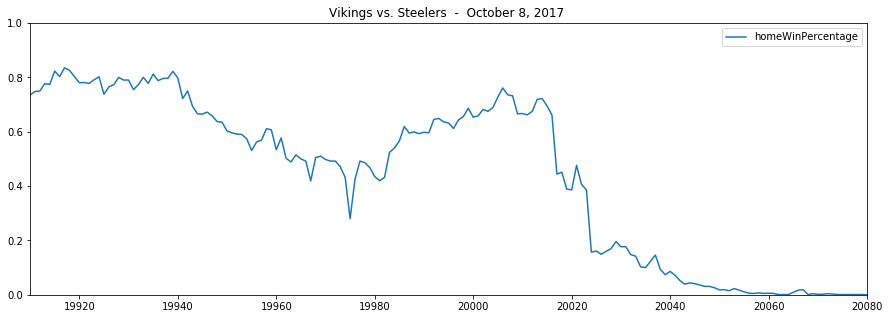

In [108]:
data = df.loc[df['Game Title'] == 'Jaguars vs. Steelers ']

data.plot(y='homeWinPercentage',
              title=game+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(min(data.index),max(data.index)))

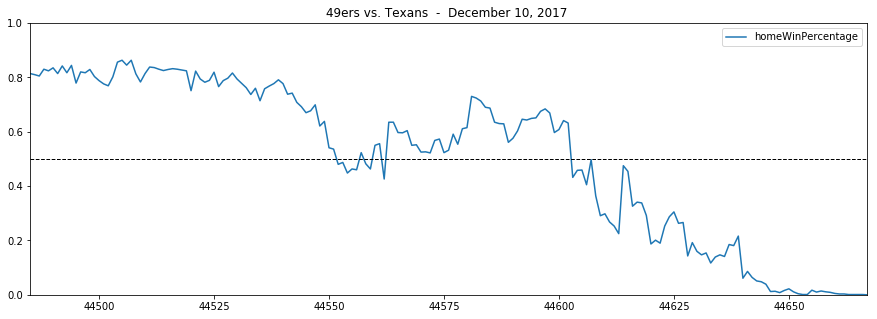

In [126]:
data = df.loc[df['Game Title'] == '49ers vs. Texans ']

data.plot(y='homeWinPercentage',
              title=data['Game Title'].iloc[0]+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(min(data.index),max(data.index)))

plt.axhline(y=0.5, lw=1, ls='dashed', color='black')

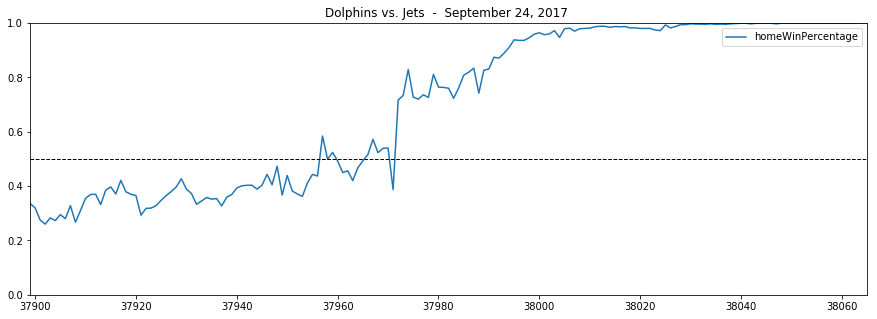

In [127]:
data = df.loc[df['Game Title'] == 'Dolphins vs. Jets ']

data.plot(y='homeWinPercentage',
              title=data['Game Title'].iloc[0]+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(min(data.index),max(data.index)))

plt.axhline(y=0.5, lw=1, ls='dashed', color='black')

In [142]:
df.loc[(df['Game Title'] == 'Jaguars vs. Patriots ')]['Game Date'].unique()

array([u' January 21, 2018 ', u' August 10, 2017 '], dtype=object)

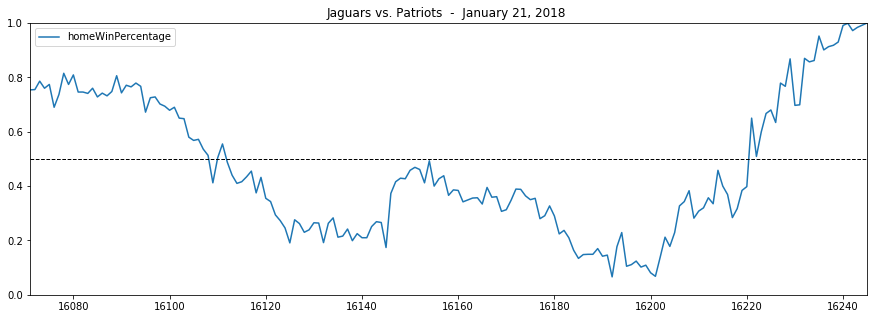

In [143]:
data = df.loc[(df['Game Title'] == 'Jaguars vs. Patriots ') & (df['Game Date'] == ' January 21, 2018 ')]

data.plot(y='homeWinPercentage',
              title=data['Game Title'].iloc[0]+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(min(data.index),max(data.index)))

plt.axhline(y=0.5, lw=1, ls='dashed', color='black')

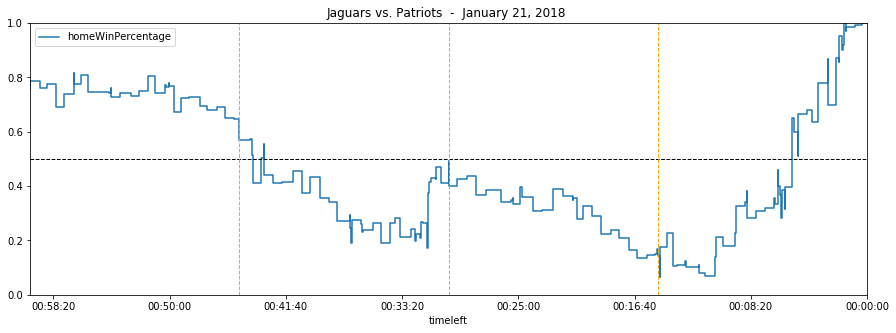

In [232]:
data = df.loc[(df['Game Title'] == 'Jaguars vs. Patriots ') & (df['Game Date'] == ' January 21, 2018 ')]

#data = data.sort_values('timeleft', ascending=False)
data.plot(x='timeleft', y='homeWinPercentage',
          drawstyle="steps-post",
              title=data['Game Title'].iloc[0]+' - '+data['Game Date'].iloc[0],
              figsize=(15,5),
              ylim=(0,1),
              xlim=(max(data['timeleft']),min(data['timeleft'])))

plt.axhline(y=0.5, lw=1, ls='dashed', color='black')
plt.axvline(x=dt.time(0,30,0), lw=1, ls='dashed', color='orange')
plt.axvline(x=dt.time(0,15,0), lw=1, ls='dashed', color='orange')
plt.axvline(x=dt.time(0,45,0), lw=1, ls='dashed', color='orange')